## Train / Test: Part 2

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

In [1]:
import pandas as pd
import numpy as np
#Load the data set and repalce the empty rows for NaN valeu
df1 = pd.read_csv('C:\\Users\\Diego Alves\\Desktop\\Data_sets\\advertising.csv',header=0,encoding = 'unicode_escape')

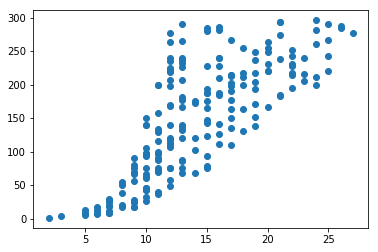

In [2]:
import matplotlib.pyplot as plt 
import numpy
%matplotlib inline
sales = numpy.array(df1['sales'])
tv = numpy.array(df1['TV'])
plt.scatter(sales, tv)

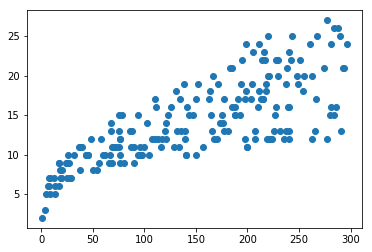

In [3]:
plt.scatter(df1['TV'], df1['sales'])

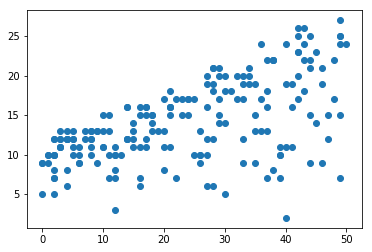

In [4]:
plt.scatter(df1['radio'], df1['sales'])

In [5]:
x = df1['radio']

In [6]:
y = df1['sales']

## Split the data: 80% and 20%
Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [7]:
from sklearn.model_selection import train_test_split
radio_train, radio_test, sales_train, sales_test= train_test_split(x,y,test_size=0.20)

In [8]:
radio_train.head(10)

74     25
191    11
82     20
199     9
171    21
68     28
183    43
27     17
63     30
192     4
Name: radio, dtype: int64

In [10]:
%matplotlib inline
import numpy as np
from pylab import *

Here's our training dataset:

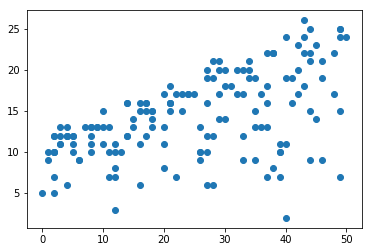

In [11]:
scatter(radio_train, sales_train)

And our test dataset:

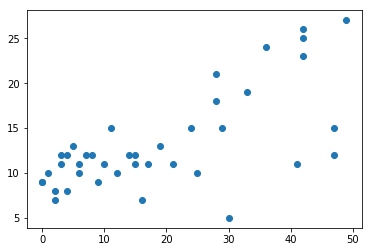

In [12]:
scatter(radio_test, sales_test)

Now we'll try to fit an 5th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [13]:
import numpy as np

x1 = np.array(radio_train)
y1 = np.array(sales_train)

p4 = np.poly1d(np.polyfit(x1, y1, 5))

Let's plot our polynomial against the training data:

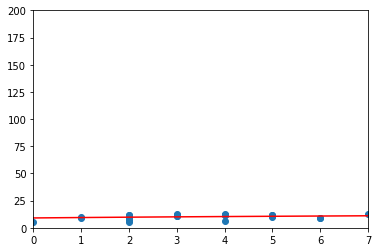

In [14]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x1, y1)
plt.plot(xp, p4(xp), c='r')
plt.show()

And against our test data:

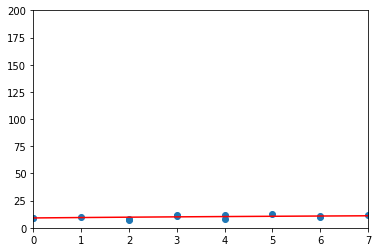

In [15]:
testx = np.array(radio_test)
testy = np.array(sales_test)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)

0.42694733813247454


...even though it fits the training data better:

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(sales_train), p4(np.array(radio_train)))

print(r2)

0.30093387940029614
